# Exploraty Spatial Data Analysis: Spatial distribution of per-capita income in Nepal



## Installation and Data

In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

Reading package lists...
Building dependency tree...
Reading state information...
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 16 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import pysal
from pysal.lib  import weights
from pysal.explore import  esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster


In [ ]:
!wget https://raw.githubusercontent.com/quarcs-lab/data-quarcs/master/nepal/nepal.geojson

--2021-01-17 12:33:16--  https://raw.githubusercontent.com/quarcs-lab/data-quarcs/master/nepal/nepal.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1474734 (1.4M) [text/plain]
Saving to: ‘nepal.geojson’

nepal.geojson       100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2021-01-17 12:33:16 (18.6 MB/s) - ‘nepal.geojson’ saved [1474734/1474734]



In [ ]:
gdf = gpd.read_file("/content/nepal.geojson")
gdf.head()

,id,id_1,name_1,id_2,name_2,id_3,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,lif40,nosafh20,population,boyg1_5,girlg1_5,kids1_5,schoolcnt,schlpkid,schlppop,ad_illit,ad_ilgt50,lon,lat,geometry
0,1,0,None,8,Dhaualagiri,60,Baglung,27.01,27.33,354,573,25613,42.9,8.52,11.12,250065,29144,31123,60267,554,9.1924,2.215424,34.46,0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,0,None,8,Dhaualagiri,61,Mustang,31.51,31.16,1189,1922,85957,54.7,12.02,8.32,11585,784,806,1590,70,44.0252,6.042296,38.65,0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,0,None,8,Dhaualagiri,62,Myagdi,30.03,28.54,636,1028,45986,47.5,7.27,12.56,109598,9035,9033,18068,273,15.1096,2.490921,34.84,0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,0,None,8,Dhaualagiri,63,Parbat,21.84,24.62,627,1013,45289,26.2,6.11,17.47,145657,11202,11280,22482,369,16.4131,2.533349,32.43,0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,1,Central,1,Bagmati,1,Bhaktapur,22.58,19.43,854,1379,61686,26.9,3.31,18.25,296705,16533,15271,31804,355,11.1621,1.196475,21.87,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."


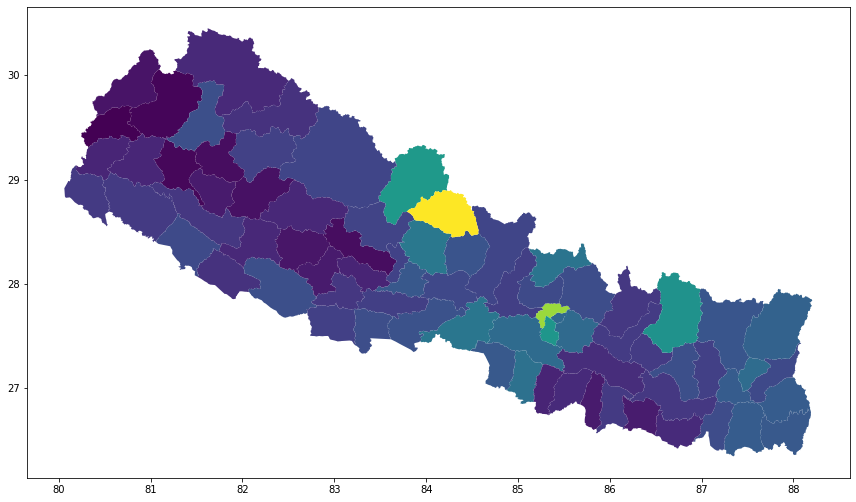

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(column="pcinc", ax=ax)
plt.tight_layout()
plt.show()

## Spatial Weights and Spatial Lag


In [ ]:
w = weights.Queen.from_dataframe(gdf, idVariable="id" )
w.transform = "R"


In [ ]:
#Spatial lag
#Spatial lag
gdf["w_pcinc"] = weights.lag_spatial(w, gdf["pcinc"])
gdf.head()

,id,id_1,name_1,id_2,name_2,id_3,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,lif40,nosafh20,population,boyg1_5,girlg1_5,kids1_5,schoolcnt,schlpkid,schlppop,ad_illit,ad_ilgt50,lon,lat,geometry,w_pcinc
0,1,0,None,8,Dhaualagiri,60,Baglung,27.01,27.33,354,573,25613,42.9,8.52,11.12,250065,29144,31123,60267,554,9.1924,2.215424,34.46,0,83.252444,28.347313,"POLYGON ((83.10834 28.62020, 83.10560 28.60976...",505.166667
1,2,0,None,8,Dhaualagiri,61,Mustang,31.51,31.16,1189,1922,85957,54.7,12.02,8.32,11585,784,806,1590,70,44.0252,6.042296,38.65,0,83.859902,28.981165,"POLYGON ((83.99726 29.31675, 84.00000 29.31576...",1079.333333
2,3,0,None,8,Dhaualagiri,62,Myagdi,30.03,28.54,636,1028,45986,47.5,7.27,12.56,109598,9035,9033,18068,273,15.1096,2.490921,34.84,0,83.461955,28.552960,"POLYGON ((83.50688 28.79306, 83.51024 28.78809...",888.857143
3,4,0,None,8,Dhaualagiri,63,Parbat,21.84,24.62,627,1013,45289,26.2,6.11,17.47,145657,11202,11280,22482,369,16.4131,2.533349,32.43,0,83.680893,28.211019,"POLYGON ((83.70261 28.39837, 83.70435 28.39452...",634.600000
4,5,1,Central,1,Bagmati,1,Bhaktapur,22.58,19.43,854,1379,61686,26.9,3.31,18.25,296705,16533,15271,31804,355,11.1621,1.196475,21.87,0,85.442906,27.677353,"POLYGON ((85.52173 27.71822, 85.52359 27.71375...",1249.333333


## Global Spatial Autocorrelation

In [ ]:
y = gdf["pcinc"]
moran = Moran(y, w)
moran.I

0.3845995532207525

In [ ]:
moran.p_sim

0.001

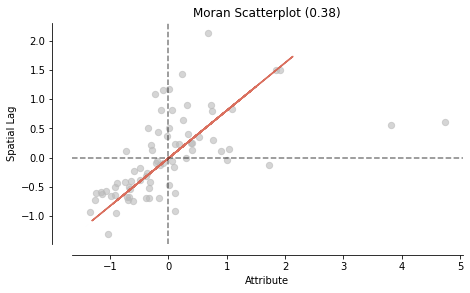

In [ ]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.savefig("scatter-moran.png")
plt.show()

## Local Spatial Autocorrelation

In [ ]:
# calculate Moran Local 
m_local = Moran_Local(y, w)

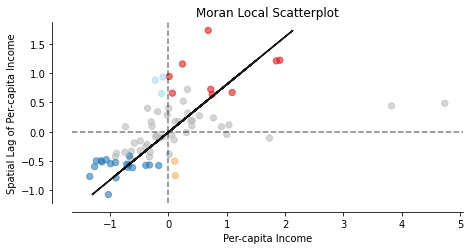

In [ ]:
# Plot
fig, ax = moran_scatterplot(m_local, p=0.05)
ax.set_xlabel('Per-capita Income')
ax.set_ylabel('Spatial Lag of Per-capita Income')
#plt.text(1.95, 0.5, "HH", fontsize=25)
#plt.text(1.95, -1.5, "HL", fontsize=25)
#plt.text(-2, 1, "LH", fontsize=25)
#plt.text(-1, -1, "LL", fontsize=25)
plt.show()

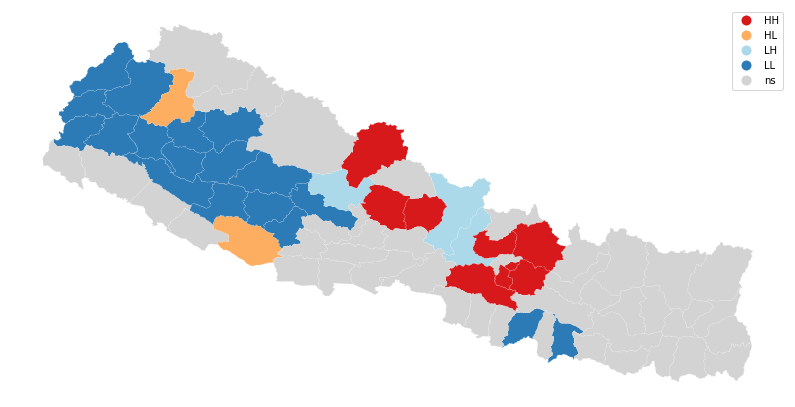

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(m_local, gdf, p=0.05, figsize = (16,12),ax=ax)
plt.show()

# End